We are going to use the Google Colab platform for this project as they provide free GPU

This is a waste classification project (part1). the dataset has been obtained from the following url:
https://www.kaggle.com/techsash/waste-classification-data

In [1]:
#commenting the below 2 lines as it contains information related to my Google account
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
import zipfile
from zipfile import ZipFile
import os, shutil
import numpy as np
import pandas as pd
import math
from math import ceil, floor
from IPython.display import display
from PIL import Image

In [0]:
def unzip_files(zipFilePath, unzip_directory):
    zipFile = ZipFile(zipFilePath, 'r')
    zipFile.extractall(unzip_directory)
    zipFile.close()
    
def delete_file_directory(path, isDirectory):
    if isDirectory:
        shutil.rmtree(path)
    else:
        os.remove(path)

In [0]:
unzip_files('drive/My Drive/datasets/waste/waste-classification-data.zip', 'Unzipped_Waste_Data_1')

In [5]:
os.listdir('Unzipped_Waste_Data_1/')

['__MACOSX', 'DATASET']

In [0]:
delete_file_directory('Unzipped_Waste_Data_1/__MACOSX', True)

In [7]:
os.listdir('Unzipped_Waste_Data_1/')

['DATASET']

In [8]:
os.listdir('Unzipped_Waste_Data_1/DATASET/')

['TRAIN', 'TEST', '.DS_Store']

In [9]:
os.listdir('Unzipped_Waste_Data_1/DATASET/TRAIN/')

['O', '.DS_Store', 'R']

In [10]:
os.listdir('Unzipped_Waste_Data_1/DATASET/TRAIN/O')[0:5]

['O_10628.jpg', 'O_1286.jpg', 'O_5386.jpg', 'O_38.jpg', 'O_769.jpg']

In [0]:
delete_file_directory('Unzipped_Waste_Data_1/DATASET/.DS_Store', False)

In [0]:
delete_file_directory('Unzipped_Waste_Data_1/DATASET/TRAIN/.DS_Store', False)
delete_file_directory('Unzipped_Waste_Data_1/DATASET/TEST/.DS_Store', False)
delete_file_directory('Unzipped_Waste_Data_1/DATASET/TRAIN/O/.DS_Store', False)
delete_file_directory('Unzipped_Waste_Data_1/DATASET/TRAIN/R/.DS_Store', False)
delete_file_directory('Unzipped_Waste_Data_1/DATASET/TEST/O/.DS_Store', False)
delete_file_directory('Unzipped_Waste_Data_1/DATASET/TEST/R/.DS_Store', False)

In [13]:
os.listdir('Unzipped_Waste_Data_1/DATASET/')

['TRAIN', 'TEST']

In [14]:
os.listdir('Unzipped_Waste_Data_1/DATASET/TRAIN/')

['O', 'R']

In [15]:
os.listdir('Unzipped_Waste_Data_1/DATASET/TRAIN/O')[0:5]

['O_10628.jpg', 'O_1286.jpg', 'O_5386.jpg', 'O_38.jpg', 'O_769.jpg']

In [16]:
os.listdir('Unzipped_Waste_Data_1/DATASET/TEST/O')[0:5]

['O_13935.jpg', 'O_13022.jpg', 'O_13718.jpg', 'O_13530.jpg', 'O_13326.jpg']

we will create a directory for the validation data

In [0]:
os.mkdir('Unzipped_Waste_Data_1/DATASET/VAL')

we will create the organic and recyclable subfolders inside the validation folder now

In [0]:
os.mkdir('Unzipped_Waste_Data_1/DATASET/VAL/O')
os.mkdir('Unzipped_Waste_Data_1/DATASET/VAL/R')

let us check the number of images in training set, we are going to use 10% of the training set as our validation

In [0]:
num_of_organic_imgs = len(os.listdir('Unzipped_Waste_Data_1/DATASET/TRAIN/O'))
num_of_recyclable_imgs = len(os.listdir('Unzipped_Waste_Data_1/DATASET/TRAIN/R'))

In [20]:
num_of_organic_imgs

12565

In [21]:
num_of_recyclable_imgs

9999

In [0]:
cur_organic_imgs = os.listdir('Unzipped_Waste_Data_1/DATASET/TRAIN/O')
for i in range(0, num_of_organic_imgs, 10):
    cur_organic_img = cur_organic_imgs[i]
    src = 'Unzipped_Waste_Data_1/DATASET/TRAIN/O/' + cur_organic_img
    dst = 'Unzipped_Waste_Data_1/DATASET/VAL/O/' + cur_organic_img
    shutil.move(src, dst)

let us check the number of organic images in the training and validation set now

In [23]:
print('number of organic images in train', len(os.listdir('Unzipped_Waste_Data_1/DATASET/TRAIN/O')))
print('number of organic images in validation', len(os.listdir('Unzipped_Waste_Data_1/DATASET/VAL/O')))

number of organic images in train 11308
number of organic images in validation 1257


Now let us follow the same procedure for the recyclable images

In [0]:
cur_recyclable_imgs = os.listdir('Unzipped_Waste_Data_1/DATASET/TRAIN/R')
for i in range(0, num_of_recyclable_imgs, 10):
    cur_recyclable_img = cur_recyclable_imgs[i]
    src = 'Unzipped_Waste_Data_1/DATASET/TRAIN/R/' + cur_recyclable_img
    dst = 'Unzipped_Waste_Data_1/DATASET/VAL/R/' + cur_recyclable_img
    shutil.move(src, dst)

In [25]:
print('number of recyclable images in train', len(os.listdir('Unzipped_Waste_Data_1/DATASET/TRAIN/R')))
print('number of recyclable images in validation', len(os.listdir('Unzipped_Waste_Data_1/DATASET/VAL/R')))

number of recyclable images in train 8999
number of recyclable images in validation 1000


let us check the size of images from the training set

In [0]:
sample_training_imgs = os.listdir('Unzipped_Waste_Data_1/DATASET/TRAIN/O')[:10]

In [27]:
for cur_img in sample_training_imgs:
    print('current image', cur_img)
    img = Image.open('Unzipped_Waste_Data_1/DATASET/TRAIN/O/' + cur_img)
    width, height = img.size
    print('image width*height:{}*{}'.format(width, height))

current image O_1286.jpg
image width*height:275*183
current image O_5386.jpg
image width*height:328*154
current image O_38.jpg
image width*height:272*185
current image O_769.jpg
image width*height:219*230
current image O_4911.jpg
image width*height:183*276
current image O_5015.jpg
image width*height:210*240
current image O_7657.jpg
image width*height:208*243
current image O_9417.jpg
image width*height:259*194
current image O_429.jpg
image width*height:275*183
current image O_3188.jpg
image width*height:259*194


We can see that the dimensions are not same for the images, we are going to resize the images to 150x150

In [0]:
def resize_imgs(path):
    imgs = os.listdir(path)
    for cur_img in imgs:
        img = Image.open(path + cur_img)
        img = img.convert('RGB')
        img = img.resize((150, 150))
        img.save(path + cur_img, 'JPEG')

In [0]:
resize_imgs('Unzipped_Waste_Data_1/DATASET/VAL/O/')

In [0]:
resize_imgs('Unzipped_Waste_Data_1/DATASET/VAL/R/')

In [0]:
resize_imgs('Unzipped_Waste_Data_1/DATASET/TEST/O/')
resize_imgs('Unzipped_Waste_Data_1/DATASET/TEST/R/')

In [0]:
resize_imgs('Unzipped_Waste_Data_1/DATASET/TRAIN/O/')
resize_imgs('Unzipped_Waste_Data_1/DATASET/TRAIN/R/')

In [33]:
base_dir = 'Unzipped_Waste_Data_1/DATASET/'
total_train_imgs = len(os.listdir(base_dir + 'TRAIN/O/')) + len(os.listdir(base_dir + 'TRAIN/R/'))
total_val_imgs = len(os.listdir(base_dir + 'VAL/O/')) + len(os.listdir(base_dir + 'VAL/R/'))
total_test_imgs = len(os.listdir(base_dir + 'TEST/O/')) + len(os.listdir(base_dir + 'TEST/R/'))
print('total training images', total_train_imgs)
print('total validation images', total_val_imgs)
print('total test images', total_test_imgs)

total training images 20307
total validation images 2257
total test images 2513


In [0]:
waste_type = {'Organic':'O','Recyclable':'R'}

Current waste type: Organic


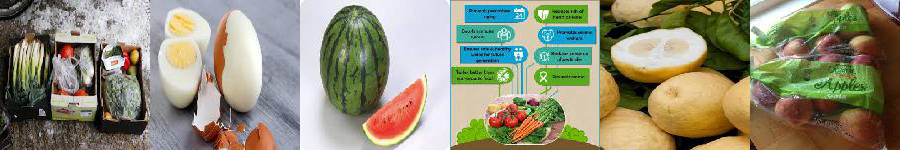

Current waste type: Recyclable


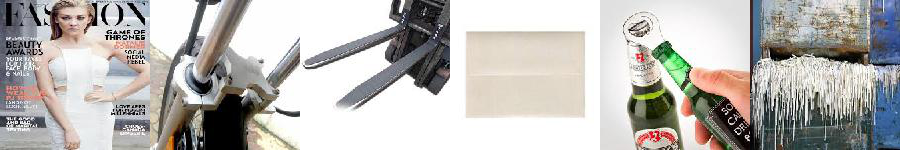

In [36]:
for key, val in waste_type.items():
    print('Current waste type:', key)
    cur_waste_type_dir = base_dir + 'TRAIN/' + val
    cur_waste_type_imgs = os.listdir(cur_waste_type_dir)[:6]
    canvas_sheet_width = 900
    canvas_sheet_height = 150
    canvas_sheet = Image.new('RGB', (canvas_sheet_width, canvas_sheet_height))
    x = 0
    for cur_img in cur_waste_type_imgs:
        img = Image.open(cur_waste_type_dir + '/' + cur_img)
        canvas_sheet.paste(img, (x, 0))
        x += 150
    display(canvas_sheet)

In [37]:
from keras import layers, models, optimizers

Using TensorFlow backend.


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_dir = 'Unzipped_Waste_Data_1/DATASET/TRAIN'
val_dir = 'Unzipped_Waste_Data_1/DATASET/VAL'
test_dir = 'Unzipped_Waste_Data_1/DATASET/TEST'

In [0]:
def get_train_datagen(augmentData):
  if augmentData:
    return ImageDataGenerator(
            rescale=1.0/255,
            rotation_range=25,
            width_shift_range=0.25,
            height_shift_range=0.25,
            shear_range=0.25,
            zoom_range=0.25,
            horizontal_flip=True,
            fill_mode='nearest'
            )
  else:
    return ImageDataGenerator(rescale=1.0/255)
  
def get_val_datagen():
  return ImageDataGenerator(rescale=1.0/255)
  
def get_test_datagen():
  return ImageDataGenerator(rescale=1.0/255)

In [0]:
def handle_model_fit_gen(model, num_epochs, train_generator, validation_generator):
  
  history_data = model.fit_generator(
      train_generator, 
      steps_per_epoch=steps_per_epoch, 
      epochs=num_epochs, 
      validation_data=validation_generator, 
      validation_steps=validation_steps)
  return history_data

In [45]:
batch_size = 64
steps_per_epoch = floor(total_train_imgs/batch_size)
validation_steps = floor(total_val_imgs/batch_size)
test_steps = floor(total_test_imgs/batch_size)
print('steps_per_epoch', steps_per_epoch)
print('validation_steps', validation_steps)
print('test_steps', test_steps)

steps_per_epoch 317
validation_steps 35
test_steps 39


In [0]:
import seaborn as sns

def create_line_charts(df, title, xlabel, ylabel):
  ax = sns.lineplot(data=df)
  ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
  
def create_acc_df(history_data, num_epochs):
  epochs_val = list(range(1, num_epochs+1))
  acc_val = history_data.history['acc']
  validation_acc_val = history_data.history['val_acc']
  acc_dict = {
      'epochs':epochs_val,
      'train_acc':acc_val,
      'val_acc':validation_acc_val
  }
  acc_df = pd.DataFrame(acc_dict)
  acc_df.set_index('epochs', inplace=True)
  return acc_df

def create_loss_df(history_data, num_epochs):
  epochs_val = list(range(1, num_epochs+1))
  loss_val = history_data.history['loss']
  validation_loss_val = history_data.history['val_loss']
  loss_dict = {
      'epochs':epochs_val,
      'train_loss':loss_val,
      'val_loss':validation_loss_val
  }
  loss_df = pd.DataFrame(loss_dict)
  loss_df.set_index('epochs', inplace=True)
  return loss_df

In [0]:
from keras.applications import VGG19

In [0]:
def get_VGG19_Conv_Base(input_shape):
  return VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

In [49]:
conv_base1 = get_VGG19_Conv_Base((150,150,3))





80142336/80134624 [==============================] - 1s 0us/step




In [50]:
conv_base1.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [51]:
custom_model1 = models.Sequential()
custom_model1.add(conv_base1)
custom_model1.add(layers.Flatten())
custom_model1.add(layers.Dropout(rate=0.3))
custom_model1.add(layers.Dense(512, activation='relu'))
custom_model1.add(layers.Dropout(rate=0.4))
custom_model1.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [52]:
custom_model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 24,219,713
Trainable params: 24,219,713
Non-trainable params: 0
__________________________________________

In [53]:
print('number of trainable weights before freezing the conv base', len(custom_model1.trainable_weights))

number of trainable weights before freezing the conv base 36


In [0]:
conv_base1.trainable = False

In [55]:
print('number of trainable weights after freezing the conv base', len(custom_model1.trainable_weights))

number of trainable weights after freezing the conv base 4


In [56]:
custom_model1.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=2e-5), metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [57]:
train_datagen1 = get_train_datagen(True)
validation_datagen1 = get_val_datagen()
test_datagen1 = get_test_datagen()

train_generator1 = train_datagen1.flow_from_directory(train_dir, target_size=(150,150), batch_size=batch_size, class_mode='binary')
validation_generator1 = validation_datagen1.flow_from_directory(val_dir, target_size=(150,150), batch_size=batch_size, class_mode='binary')

Found 20307 images belonging to 2 classes.
Found 2257 images belonging to 2 classes.


In [58]:
model_history_data1 = handle_model_fit_gen(custom_model1, 75, train_generator1, validation_generator1)

Epoch 1/75
317/317 [==============================] - 163s 513ms/step - loss: 0.5220 - acc: 0.7527 - val_loss: 0.3804 - val_acc: 0.8375
Epoch 2/75
317/317 [==============================] - 159s 501ms/step - loss: 0.4342 - acc: 0.8114 - val_loss: 0.3445 - val_acc: 0.8545
Epoch 3/75
317/317 [==============================] - 156s 493ms/step - loss: 0.4103 - acc: 0.8228 - val_loss: 0.3376 - val_acc: 0.8655
Epoch 4/75
317/317 [==============================] - 157s 496ms/step - loss: 0.3914 - acc: 0.8338 - val_loss: 0.3284 - val_acc: 0.8737
Epoch 5/75
317/317 [==============================] - 157s 495ms/step - loss: 0.3824 - acc: 0.8377 - val_loss: 0.3591 - val_acc: 0.8573
Epoch 6/75
317/317 [==============================] - 158s 498ms/step - loss: 0.3773 - acc: 0.8411 - val_loss: 0.3011 - val_acc: 0.8805
Epoch 7/75
317/317 [==============================] - 158s 497ms/step - loss: 0.3659 - acc: 0.8471 - val_loss: 0.3214 - val_acc: 0.8755
Epoch 8/75
317/317 [============================

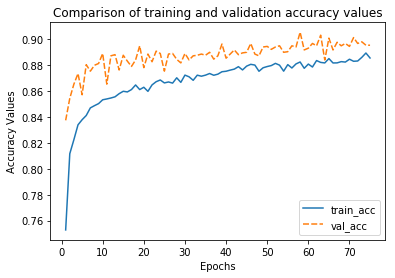

In [59]:
create_line_charts(create_acc_df(model_history_data1, 75), 'Comparison of training and validation accuracy values', 'Epochs', 'Accuracy Values')

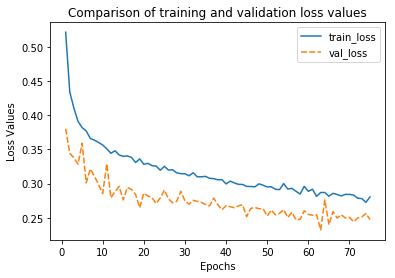

In [60]:
create_line_charts(create_loss_df(model_history_data1, 75), 'Comparison of training and validation loss values', 'Epochs', 'Loss Values')

In [61]:
test_generator1 = test_datagen1.flow_from_directory(test_dir, target_size=(150,150), batch_size=batch_size, class_mode='binary')
test_loss1, test_accuracy1 = custom_model1.evaluate_generator(test_generator1, steps=test_steps)
print('test_loss', test_loss1)
print('test_accuracy', test_accuracy1)


Found 2513 images belonging to 2 classes.
test_loss 0.33857360596840197
test_accuracy 0.8725961538461539


Let's now attempt fine tuning and assess whether we can further improve the performance

In [0]:
conv_base2 = get_VGG19_Conv_Base((150,150,3))

In [0]:
def print_layer_details(conv_base):
  
  for layer in conv_base.layers:
    print('layer name:', layer.name)
    print('layer trainable:', layer.trainable)

In [0]:
def fine_tune_conv_base_block(conv_base, block_name_start):
  trainable = False
  for layer in conv_base.layers:
    if layer.name.startswith(block_name_start):
      trainable = True
    layer.trainable = trainable

In [65]:
print_layer_details(conv_base2)

layer name: input_2
layer trainable: False
layer name: block1_conv1
layer trainable: True
layer name: block1_conv2
layer trainable: True
layer name: block1_pool
layer trainable: True
layer name: block2_conv1
layer trainable: True
layer name: block2_conv2
layer trainable: True
layer name: block2_pool
layer trainable: True
layer name: block3_conv1
layer trainable: True
layer name: block3_conv2
layer trainable: True
layer name: block3_conv3
layer trainable: True
layer name: block3_conv4
layer trainable: True
layer name: block3_pool
layer trainable: True
layer name: block4_conv1
layer trainable: True
layer name: block4_conv2
layer trainable: True
layer name: block4_conv3
layer trainable: True
layer name: block4_conv4
layer trainable: True
layer name: block4_pool
layer trainable: True
layer name: block5_conv1
layer trainable: True
layer name: block5_conv2
layer trainable: True
layer name: block5_conv3
layer trainable: True
layer name: block5_conv4
layer trainable: True
layer name: block5_po

In [0]:
fine_tune_conv_base_block(conv_base2, 'block4')

In [68]:
print_layer_details(conv_base2)

layer name: input_2
layer trainable: False
layer name: block1_conv1
layer trainable: False
layer name: block1_conv2
layer trainable: False
layer name: block1_pool
layer trainable: False
layer name: block2_conv1
layer trainable: False
layer name: block2_conv2
layer trainable: False
layer name: block2_pool
layer trainable: False
layer name: block3_conv1
layer trainable: False
layer name: block3_conv2
layer trainable: False
layer name: block3_conv3
layer trainable: False
layer name: block3_conv4
layer trainable: False
layer name: block3_pool
layer trainable: False
layer name: block4_conv1
layer trainable: True
layer name: block4_conv2
layer trainable: True
layer name: block4_conv3
layer trainable: True
layer name: block4_conv4
layer trainable: True
layer name: block4_pool
layer trainable: True
layer name: block5_conv1
layer trainable: True
layer name: block5_conv2
layer trainable: True
layer name: block5_conv3
layer trainable: True
layer name: block5_conv4
layer trainable: True
layer name

In [0]:
custom_model2 = models.Sequential()
custom_model2.add(conv_base2)
custom_model2.add(layers.Flatten())
custom_model2.add(layers.Dropout(rate=0.3))
custom_model2.add(layers.Dense(512, activation='relu'))
custom_model2.add(layers.Dropout(rate=0.4))
custom_model2.add(layers.Dense(1, activation='sigmoid'))

In [70]:
custom_model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 24,219,713
Trainable params: 21,894,145
Non-trainable params: 2,325,568
__________________________________

In [71]:
print('number of trainable weights', len(custom_model2.trainable_weights))

number of trainable weights 20


In [0]:
custom_model2.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=2e-5), metrics=['accuracy'])

In [73]:
train_datagen2 = get_train_datagen(True)
validation_datagen2 = get_val_datagen()
test_datagen2 = get_test_datagen()

train_generator2 = train_datagen2.flow_from_directory(train_dir, target_size=(150,150), batch_size=batch_size, class_mode='binary')
validation_generator2 = validation_datagen2.flow_from_directory(val_dir, target_size=(150,150), batch_size=batch_size, class_mode='binary')

Found 20307 images belonging to 2 classes.
Found 2257 images belonging to 2 classes.


In [74]:
model_history_data2 = handle_model_fit_gen(custom_model2, 50, train_generator2, validation_generator2)

Epoch 1/50
317/317 [==============================] - 184s 581ms/step - loss: 0.3519 - acc: 0.8528 - val_loss: 0.2300 - val_acc: 0.9116
Epoch 2/50
317/317 [==============================] - 182s 575ms/step - loss: 0.2423 - acc: 0.9064 - val_loss: 0.1803 - val_acc: 0.9284
Epoch 3/50
317/317 [==============================] - 182s 575ms/step - loss: 0.2148 - acc: 0.9161 - val_loss: 0.2162 - val_acc: 0.9179
Epoch 4/50
317/317 [==============================] - 181s 571ms/step - loss: 0.1971 - acc: 0.9233 - val_loss: 0.1784 - val_acc: 0.9380
Epoch 5/50
317/317 [==============================] - 181s 571ms/step - loss: 0.1789 - acc: 0.9309 - val_loss: 0.1553 - val_acc: 0.9435
Epoch 6/50
317/317 [==============================] - 181s 570ms/step - loss: 0.1693 - acc: 0.9338 - val_loss: 0.1670 - val_acc: 0.9398
Epoch 7/50
317/317 [==============================] - 181s 570ms/step - loss: 0.1535 - acc: 0.9406 - val_loss: 0.1827 - val_acc: 0.9325
Epoch 8/50
317/317 [============================

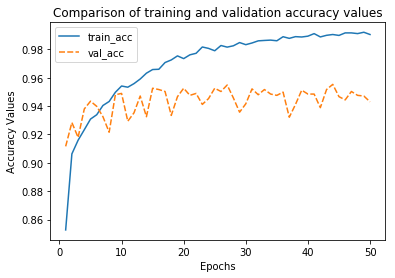

In [75]:
create_line_charts(create_acc_df(model_history_data2, 50), 'Comparison of training and validation accuracy values', 'Epochs', 'Accuracy Values')

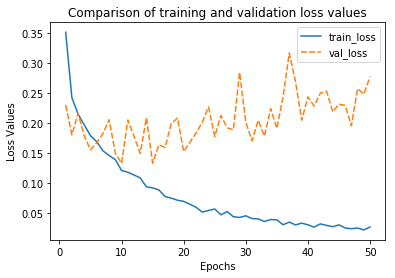

In [76]:
create_line_charts(create_loss_df(model_history_data2, 50), 'Comparison of training and validation loss values', 'Epochs', 'Loss Values')

In [77]:
test_generator2 = test_datagen2.flow_from_directory(test_dir, target_size=(150,150), batch_size=batch_size, class_mode='binary')
test_loss2, test_accuracy2 = custom_model2.evaluate_generator(test_generator2, steps=test_steps)
print('test_loss', test_loss2)
print('test_accuracy', test_accuracy2)

Found 2513 images belonging to 2 classes.
test_loss 0.43407525714391315
test_accuracy 0.9086538461538461
